$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

# Introduction

The goal of this workshop is to get you acquainted with how Multi-Qubit Quantum Gates Work

# Review of Single Qubit Gates

Before we get into some new content, I'd like to review some of the stuff we went through last time as well as clarify some remarks made before

## The Qubit 

Recall that the Qubit is inherently Quantum Mechanical in nature and has an associated "wave function" describing all properties we want to know about it, usually denoted $\psi$

However, due to the properties of __Infinite Dimensional Hilbert Space__ we can represent and manipulate quantum objects with linear algebra.

In this case, the Qubit is represented by a column vector with two entries:

$$
\begin{bmatrix}
\alpha \\
\beta \\
\end{bmatrix}
$$

Also recall that the __Dirac Notation__ lets us write such vectors as a "ket" like so: $\ket{vector}$ where the stuff in the "ket" is just a label for keeping track of things and that if you want to multiply a "ket" by a matrix, you just do:
$$
A \ket{x}
$$
Assuming $A$ is the matrix.

Furthermore, the qubit vector is constructed from two __basis states__ equivalent to the "0" and "1" our current computers, and are put in a __linear combination__ that can represent the probability the Qubit will be in the "0" or "1" state upon measurement:


You'd represent it like so:

$$ \ket{\text{qubit}} = a\ket{0} + b\ket{1} $$

Where

$$ \ket{0} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} $$
$$ \ket{1} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} $$

and $a$ and $b$ must satisfy the following:

$$ \left| a \right|^2 + \left| b \right|^2 = 1 $$

## Visualization

We can use the __Bloch Sphere__ for visualizing single qubit states.

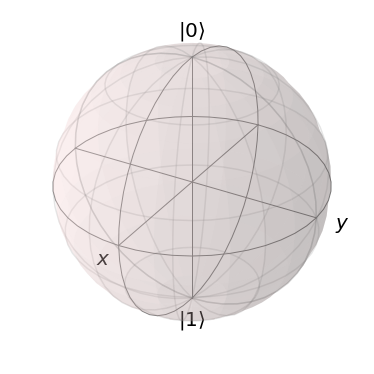

In [2]:
from qutip import *
b = Bloch()
b.show()

Note that the $\ket{0}$ and $\ket{1}$ states are at the polar opposites of the sphere. When the qubit is in superposition, the vector can point to any part of the sphere but when we need to get a value out of the qubit (extract data) we need to perform a measurement which forces the qubit to be in the $\ket{0}$ or $\ket{1}$ state and therefore, point vertically up or down.

## The Gates

We represent gates that act on single qubits as $2 \times 2$ matrices and just multiply them with the qubit to get the new state of the qubit.

Some of the gates we investigated were:

### (Pauli-X) X gate

"flips" the current qubit state (can be thought of as a 180 degree rotation around the x-axis of the Bloch Sphere).
If you had your qubit set to the 0 state, you'd find yourself in the 1-state.

Its matrix is represented like so:

$$X = 
\begin{bmatrix}
0 & 1 \\
1 & 0 \\
\end{bmatrix}
$$

### Hadamard (H) gate

Puts a qubit into perfect superposition between the 1 and 0 state with the following matrix:

$$H = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix}
$$

### $\pi/8$ (T) gate

rotates the qubit vector by $\frac{\pi}{4}$ along some "altitude" of the sphere.

This gate introduced the concept of "phase", a property that doesn't alter the probability that the qubit can be in the "0" or "1" state but shows how a qubit can encode a great deal more information than just superposition. 

$$T=
\begin{bmatrix}
1 & 0 \\
1 & e^{i\pi/4}
\end{bmatrix}
$$

## Corrected Properties of Gates

In the last workshop, I mentioned that two properties of Quantum Logic gates are 

* Reversability
* Unitarity

### Reversability $\neq$ Self-Reversability
It turns out that the definitions I gave were not wholly correct and missing some crucial details. 

Let's begin with Reversability. The prior workshop made the statement that ALL gates, after manipulating some qubit, can be fed that qubit again and return the qubit to its original state. 

Mathematically, this means that the matrix is its own __inverse__ capable of undoing its own operations through multiplication and is represented like so:

$$ U = U^{-1}$$

This is __False__. It is true that all operations performed by quantum logic gates are reversible, but is not true that they have to be reversible by themselves. The T gate is a perfect example of this. An inverse must exist, but that inverse does NOT have to be the gate itself.

### Approaching Unitarity

This brings us to Unitarity.

The definition in the prior workshop of Unitarity was correct, but severely lacking as Unitarity is a major reason for why reversability exists in the first place. 

The reason we need unitariy matrices is because they have an important property relating to the normalization of probabilities: When you manipulate a qubit, your chances of getting "0" or "1" must *still add up to 1*! It wouldn't make sense for me to perform some operation and get probabilities that add up to 0.5 or 2! 

The mathematical expression quantifying unitarity was given like so:

$$U^{\dagger }U=UU^{\dagger }=I$$


This is technically correct but somewhat confusing as the real expression to pay attention to is this:

$$U^{\dagger} = U^{-1}$$

This states that a matrix is unitary if taking the __hermitian conjugate__ of the matrix produces its inverse. Furthermore, this means that if a matrix is unitary, an inverse for such a matrix must exist.

Hence, why gates are reversible.

Within these unitary matrices however, we have __hermitian__ and __non-hermitian__ matrices, which is how we distinguish between gates that are self-invertible (we can put a qubit through the gate, then put it through again to get the original state) and non-self-invertible (think T gate, putting the qubit through again does not give you your original vector).

### Hermitian Operators

A __Hermitian Operator__ is one that satisifies the following property:

$$
A = A^{\dagger}
$$

Where the matrix is its own hermitian conjugate (recall this is just conjugating each element by changing the sign in front of the complex component of the value, if any, and then swapping the rows and columns of the matrix). 

IF a unitary operator is hermitian, then we get the following relationship:
$$
A = A^{\dagger} = A^{-1}
$$
Which means
$$
A = A^{-1}
$$
Thereby stating that a gate is self-inversible if and only if it is unitary __AND__ hermitian

`qutip`, the Python library we've been using, actually has a nice feature where it tells you if the operator you've created is Hermitian with the `isherm` trait, printed for you to view but also extractable as seen below:

In [ ]:
# import libraries
import numpy as np
from qutip import *

# Create matrix
id_matrix = np.array([[1, 0], [0, 1]])
# Create Operator
I = Qobj(id_matrix)
# extract "isherm"
I.isherm

### Gates vs Operators

As a final clarification, quantum gates fall under quantum operators, but not all quantum operators have to follow unitarity. 

## Numpy Behavior

From our last workshop, you've been using `numpy` (abbreviated as `np` from importing into Python) as the standard math component of our experiments, creating vectors and matrices. However, you may have noticed some ambiguity between `np.array()` and `np.matrix()`.

`np.matrix()` is a kind of `np.array()` but has added, built-in features that make matrix operations a lot easier which `np.array()` does not have.

Unfortunately, if you declare column vectors with `np.array()` and try to multiply it by an `np.matrix()` things fall apart because by default, the `np.array` is a __Row Vector__, not a column vector and the dimensions don't match.

To make things more standardized and explicit, as well as allow for future flexibility, I've opted to use `np.array()` as much as possible starting from this workshop.

# Representing Two Qubits

When we have a singular qubit, we can just represent it like so:

Where
$$ \ket{\text{qubit}} = a\ket{0} + b\ket{1} $$

with the kets representing:

$$ \ket{0} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} $$
$$ \ket{1} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} $$

and $a$ and $b$ must satisfy the following:

$$ \left| a \right|^2 + \left| b \right|^2 = 1 $$

How do we go about representing a system of two qubits?

Naively, we'd assume that we could just have two seperate vectors, one for each qubit, but this fails to capture the true Quantum Mechanical nature of the system.

Recall that we chose $\ket{0}$ and $\ket{1}$ as basis vectors and used a combination of them to represent superposition. This superpositon was between two states.

If we have two qubits, that means that we can have four possible final states, given us four different basis vectors:

$$
\ket{00}, \ket{01}, \ket{10}, \ket{11}
$$

This also means that the following should be true:

$$ \ket{\text{two-qubit}} = a\ket{00} + b\ket{01} + c\ket{10} + d\ket{11} $$

where the followign property holds true:

$$ \left| a \right|^2 + \left| b \right|^2 + \left| c \right|^2 + \left| d \right|^2 = 1 $$

To generate the actual vectors behind these kets, we use the __tensor product__ or __Kronecker product__ (technically different but for our purposes, perform identical operations)

## Tensor Product

The tensor product does the following given 2, 2 entry column vectors:

$$
\begin{bmatrix}
    \alpha \\
    \beta
\end{bmatrix}
\otimes
\begin{bmatrix}
    \gamma \\
    \delta
\end{bmatrix}
=
\begin{bmatrix}
\alpha & \begin{bmatrix} \gamma \\ \delta \end{bmatrix} \\
\beta & \begin{bmatrix} \gamma \\ \delta \end{bmatrix} \\
\end{bmatrix}
= 
\begin{bmatrix}
\alpha\gamma \\
\alpha\delta \\
\beta\gamma \\
\beta\delta\\
\end{bmatrix}
$$

## Generating Two-Qubit Vectors

To generate the basis vectors, we take the tensor produt between two single qubit basis vectors.

That seems like a bit of a mouthful so lets actually put it in action.

let's say that I have my first qubit in the $\ket{0}$ basis and my second qubit in the $\ket{1}$ basis. This will give us the $\ket{01}$ basis in the two-qubit representation

The two qubit representation is:

$$
\begin{bmatrix}
1 \\
0 \\
\end{bmatrix}
\otimes
\begin{bmatrix}
0 \\
1 \\
\end{bmatrix}
=
\begin{bmatrix}
0 \\
1 \\
0 \\
0 \\
\end{bmatrix}
$$

In code we can do it like so:

In [ ]:
# Remember, we already imported numpy in a prior cell so no need to do it again
# These represent our 0 and 1 single qubit basis vectors

# Note that we declare the vectors like matrices with nested square brackets "[[]]" instead of just a single pair,
# and then take the transpose to go from row to column vector
s_0 = np.array([[1, 0]]).T
s_1 = np.array([[0, 1]]).T

# These represent 00, 01, 10, and 11 basis vectors for two qubits
s_00 = Qobj(np.kron(s_0, s_0))
s_01 = Qobj(np.kron(s_0, s_1))
s_10 = Qobj(np.kron(s_1, s_0))
s_11 = Qobj(np.kron(s_1, s_1))

### Remembering Vector "Probability Encoding"
And as a friendly reminder, the Dirac Notation equivalent is:

$$ \ket{0} \otimes \ket{1} = \ket{01} $$

An easier way to remember the state vectors for two qubits and beyond is the following pattern. In the one qubit vector your chances of getting "0" or "1" are "encoded" in the qubit vector like so:

$$
\ket{\text{qubit}} = 
\begin{bmatrix}
a_{0} \\
a_{1} \\
\end{bmatrix}
$$

where the subscripts represent the coefficient that gives the chances the qubit will collapse into "0" or "1". For two qubits it turns into the following:

$$
\ket{\text{two-qubit}} = 
\begin{bmatrix}
a_{00} \\
a_{01} \\
a_{10} \\
a_{11} \\
\end{bmatrix}
$$

where the subscripts represent the coefficient that gives the chances the qubit will collapse into "00", "01", "10", or "11"

This trick is expandable as you keep increasing qubits. The coefficients are in descending order of binary value (00 = 0, 01 = 1, 10 = 2, 11 = 3 for two-qubits)

# Measuring Qubits

With a single qubit, finding the probability a measurement would produce a "0" or a "1" was a trivial matter, you just had to look at the individual entries in each row, pick an entry and square the absolute value of it to get the chance it would be in one or the other state.

With multiple qubits, we can still do the same thing but now we have four possibilities instead of two. If I wanted the probability the two qubits would collapse into "00", I'd just look at the first entry in the vector and perform the necessary math to get the actual probability. 

This isn't the only method of measurement however. 

## Partial Measurement

Let's take the scenario where I measure only ONE of the qubits, and leave the other one to be measured later.

What does this do to probability distribution of states in the two-qubit system?

Let's say I measured the first qubit to be in the $\ket{0}$ basis.

This means that any two-qubit bases requiring 1 in the beginning can't be measured so $\ket{10}$ and $\ket{11}$ can't possibly be measured.

That means that the probability is spread between $\ket{00}$ and $\ket{01}$ like so:

$$
\frac{\alpha\ket{00} + \beta\ket{01}}{\sqrt{\left| \alpha \right|^2 + \left| \beta \right|^2}}
$$

Where $\alpha$ and $\beta$ are found in the full two-qubit vector as the probabilities of $\ket{00}$ and $\ket{01}$ respectively

Equivalently re-written with the help of the tensor product:

$$
\ket{0} \otimes
\frac{\alpha\ket{0} + \beta\ket{1}}{\sqrt{\left| \alpha \right|^2 + \left| \beta \right|^2}}
$$

The reason we have to do the whole sum of absolute values and squaring is for normalization, to make sure that all the existing probabilities will add up to 1. 

## Visualization

*n*-qubit systems don't really have particularly nice ways of viewing them. 

With singule qubits, we could always rely on the Bloch Sphere. With multiple qubits however, things get a little hairy.

There's something known as __Quantum State Tomography__ as well as __Quantum Phase Tomography__ you can use to visualize multiple qubit systems but which won't be introduced in this workshop for the sake of time. You can expect to see it quite soon in future workshops as we work with even more qubits.

# Two-Qubit Gates

With a solid understanding of single qubit gates, we can move onto gates that deal with multiple qubits.

Recall that a single qubit gate is a unitary $2 \times 2$ matrix. This works when we're just multiplying by a column vector that has two entries.

For column vectors with four entries (like the one that represents our two-qubit system), the matrices also have to become bigger. More specifically, they become $4 \times 4$ to allow for proper matrix multiplication (and a result that makes sense!).

Let's go ahead and take a look at some of these gates.

## SWAP

The SWAP gate does exactly what you think it does: Given two qubits, it swaps the value of one for another.

For example, if I began with the configuration $\ket{01}$, the resulting answer would be $\ket{10}$, with the two qubits literally swapping values.

The matrix of this gate looks like this:

$$ 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
$$

Let's go ahead and create it below:

In [ ]:
# Create SWAP matrix
swap = np.array([[1, 0, 0 ,0], [0, 0, 1, 0 ], [0, 1, 0, 0], [0, 0, 0, 1]])
# Verify the Unitary Identity (U^dagger = U^-1 or U*U^dagger = U^dagger*U = I
# Remember, in numpy, if you have a matrix you can just use ".H" to automatically generate the Hermitian Conjugate
# If you have a matrix declared as an array type, you have to use the "np.asmatrix()" function to get a matrix out
# Or, you can opt for the more explicit "array.conj().T" which does the same thing as ".H" but more explicitly

# np.array_equal is a tool in Numpy for checking if arrays are equivalent
# np.identity(n) generates a square identity matrix
np.array_equal(np.asmatrix(swap).H * swap, np.identity(4))

In [ ]:
# Create SWAP gate
SWAP = Qobj(swap)
SWAP
# Note that `isherm` is true meaning that this gate is self-reversible

In [ ]:
# MAKE SURE YOU HAVE RUN THE CELL AFTER THE "GENERATING TWO QUBIT VECTOR" SECTION!
# This creates the variables s_00, s_01, s_10, and s_11 which represent four different two-qubit configurations
# we can jumpstart with. 

# Let's apply the gate to the two-qubit state "01". The gate should "swap" the qubits so we get "10"

result = SWAP * s_01
result

In [ ]:
# The result accords with our guess, that "01" gives "10" (remember the vector encoding rule above!)

# Now let's confirm that this is a self-inverse gate. The math checks out but as cautious scientists, we always
# want to see some real phenomena from what we predict

reversed_result = SWAP * result
reversed_result

In [ ]:
# Sure enough, we get our "01" state back

## CNOT/CX - Controlled NOT/X

The CNOT or CX gate has behavior very similar to the NOT/X gate we introduced in the last workshop except it takes ANOTHER qubit to "Control" it.

If the __control qubit__ is in the "1" configuration, it will apply the NOT gate to the __target qubit__.
If the control qubit is in the "0" configuration, it will NOT apply the NOT gate to the target qubit. 

The matrix of CNOT is as follows:
$$
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{bmatrix}
$$

We can go ahead and build it like so:

In [ ]:
# Build the gate from the matrix. Note that we can put all the steps needed to make a matrix, then a Quantum Object
# on the same line.

# Futhermore, note that `isherm` is `True` meaning that this gate is self-reversible
CNOT = Qobj(np.array([[1,0,0,0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]]))
CNOT

In [ ]:
# Let's choose a two-qubit state that will let us witness some behavior.
# CNOT only applies the NOT to the second qubit if the first one is "1" so that leaves us with "11" and "10".
# We choose 11 and apply the gate to it:

result = CNOT * s_11
result

In [ ]:
# Our result is "10" as expected, due to the fact that the first qubit was "1" which means the NOT is applied on
# the second qubit, turning "0" into "1" 
# Let's go ahead and confirm that if the first qubit is "0", nothing happens. 

In [ ]:
result = CNOT * s_00
result

In [ ]:
# We note that the result is still "00"

In [ ]:
# The gate was also shown to be self reversible which means if we apply it twice, we should get the original state back
# In other words: CNOT * CNOT * qubit_state = qubit_state
result = CNOT * CNOT * s_11

result

In [ ]:
# This holds true, we still get "11" back after plugging "11" in

## Control Class Gates

CNOT isn't the only gate that takes another qubit to dictate how it will apply another gate. There is a nice mathematical template for creating Controlled Gates.

All controlled gates have the following matrix:

$$
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00} & u_{01} \\
0 & 0 & u_{10} & u_{11} \\
\end{bmatrix}
$$

Where

$$
\begin{bmatrix}
u_{00} & u_{01} \\
u_{10} & u_{11} \\
\end{bmatrix}
$$

can be the matrix for any single qubit gate.

An important thing to note here is that this matrix takes the form of a __block diagonal matrix__. A __block matrix__ is one that has been interprted as being brocken in __blocks__, which are like smaller matrices inside the main matrix.
A __block diagonal matrix__ is one where these blocks lay on the diagonal of the matrix. This knowledge will prove useful as we build our own Control Gate:

### CH (Control Hadamard)

In this gate, if the control qubit is a "1" , we apply the H gate. If not, we don't do anything.

We know the matrix for a Hadamard is:

$$
H = 
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1 \\ 
\end{bmatrix}
$$

So if we embedded it into the template matrix above we should get:

$$ 
CH = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}  \\
0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\
\end{bmatrix}
$$

We build it like so:

In [ ]:
# We'll be using a tool from another Python math library `scipy` to create a block diagonal matrix
from scipy.linalg import block_diag

# We create the 2x2 identity matrix in the upper left of the diagonal
# Then we create the 2x2 hadamard matrix at lower right of the diagonal
identity_matrix = np.identity(2)
hadamard_matrix = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]])
# We can now use the individual 2x2 matrices to generate the block diagonal matrix
control_hadamard_matrix = block_diag(identity_matrix, hadamard_matrix)
control_hadamard_matrix

In [ ]:
# Now lets turn the matrix into an actual gate
CH = Qobj(control_hadamard_matrix)
CH

In [ ]:
# Let's once again choose a two-qubit state where something will happen
# We know the first qubit has to be "1" so we can choose from "10" or "11"

result = CH * s_10
result

In [ ]:
# It looks like something changed, but to truly verify what happened, 
# we need to remember that the hadamard puts a qubit in perfect superposition
# (50-50 chance of 1 or 0)
# We know that the first qubit was 1, which means the result has to be some 50-50 between
# 10 and 11

# To verify this we can extract the vector from the resulting "Quantum Object" from `qutip`
# and perform the math need to check the probabilities. Note that the vector in the qubit is
# represented in `qutip` as a matrix (hence the double-indexing like [row][column]) 

result_vector = result.data.toarray()
chance_of_10 = abs(result_vector[2][0])**2
print("The probability of |10> is: ", chance_of_10)
chance_of_11 = abs(result_vector[3][0])**2
print("The probability of |11> is: ", chance_of_11)

# Three Qubit Gates


Why stop at two qubits? three or more qubit gates exist.

If we have three qubits, our basis vectors go from 4 for two qubits to $2^{3}$ or 8 basis vectors:
$$
\ket{000}, \ket{001}, \ket{010}, \ket{011},...,\ket{111}
$$

Futhermore, the column vector we use has to grow in size from four entries to eight entries:

$$
\ket{\text{three_qubit}} =
\begin{bmatrix}
a_{000} \\
a_{001} \\
a_{010} \\
\vdots \\
a_{111} \\
\end{bmatrix}
$$

and our gates must be represented by $8 \times 8$ unitary matrices

Building off of our knowledge of control gates which take a __control qubit__ and depending upon its state manipulate a __target qubit__, we can extend this to three qubits where we can have one of two possibilities:

1. You have two control qubits target one qubit or 
2. You have one control qubit target two qubits

The __CSWAP__ or __Controlled SWAP__ gate is an example of case 2 where one qubit determines if two qubits get swapped but there's also the __CCNOT__ or __Toffoli Gate__ which applies a NOT on one qubit only when two control qubits are "1".

## CSWAP - Controlled SWAP

The CSWAP gate, when its control qubit is in the "1" state, will swap the other two qubits. 

So if I start off with a state of $\ket{110}$, I should get $\ket{101}$ because the control was "1" so the other two qubits will swap. Likewise, if the state was $\ket{010}$, nothing changes because the control was $\ket{0}$

The matrix for CSWAP is like so:

$$
CSWAP = 
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
$$

I'd like to point out this is very similar to an extended version of the control matrix template, which is just a diagonal block matrix with two other matrices embedded in its diagonal:

$$
\begin{bmatrix}
I & 0 \\
0 & SWAP\\
\end{bmatrix}
$$

The only difference being that the identity and the SWAP are $4 \times 4$ instead of $2 \times 2$

We can now build it below:

In [ ]:
# Create the identity and re-use the existing 4x4 swap matrix made before
identity_matrix = np.identity(4)
control_swap_matrix = block_diag(identity_matrix, swap)
control_swap_matrix

In [ ]:
# Actually create the gate
CSWAP = Qobj(control_swap_matrix)
CSWAP

In [ ]:
# Recall that to generate multi-qubit state vectors, we use the tensor/kronecker product.
# For three or more qubits, this is no different.
# We want to witness the gate work, so we need to choose a multiqubit state that permits
# such behavior.

# For all control gates, the control qubit should be "1" and since this is controlled swap,
# we should see the two target qubits like "10" become "01". So, we choose "110"
# This mean that we take the tensor product of |1>, |1>, |0> to feed in and that the result 
# becomes "101"

# s_0 and s_1 were already defined in the very beginning of the notebook to represent the 
# single qubit state vectors for "0" and "1" respectively.

# With this knowledge, we create our triple qubit state
# Note that the numpy kronecker product can only take two values at a time, so we just nest
# them to get three
s_110 = Qobj(np.kron(np.kron(s_1, s_1), s_0))
s_110

In [ ]:
# Now we apply the gate and inspect the results
results = CSWAP * s_110
results

In [ ]:
# We can see that the result is indeed what we expect, "101"

# Parallel Gates

Let's investigate the scenario where I want to apply a Hadamard on EACH qubit in parallel (at the same time).

We know what the matrix is for a single qubit Hadamard:

$$
H = 
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1 \\ 
\end{bmatrix}
$$

To represent a Hadamard being applied on both gates we once again use the tensor product to generate a two-qubit gate:

$$
H^{\otimes2}= H \otimes H = 
\frac{1}{2}
\begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & -1 & 1 & -1 \\
1 & 1 & -1 & -1 \\
1 & -1 & -1 & 1\\
\end{bmatrix}
$$

And we can just multiply by whatever basis our qubits are in.

This can be done with any $2 \times 2$ matrix gate and for higher numbers of qubits, you still can use $2 \times 2$ matrices but you'll need to perform more tensor product operations

We can do it like so:

In [ ]:
# The hadamard matrix was already defined before
hadamard_matrix

In [ ]:
# Take the tensor product
parallel_hadamard = np.kron(hadamard_matrix, hadamard_matrix)
PARALLEL_H = Qobj(parallel_hadamard)
PARALLEL_H

In [ ]:
# Apply the two individual hadamards to qubits in s_00
result = PARALLEL_H * s_00
result

In [ ]:
# This behavior appears correct because since the individual hadamard puts EACH qubit
# into a superposition of 1 or 0 our chances of every possible state are 25% (remember,
# take a single entry, then do absolute_value(entry)^2 to get the actual probability

## Apply One Gate to Multiple Qubits

What if I only want to apply a gate to a single qubit in a system of multiple?

We still use the tensor product but we use the identity matrix on one of the qubits to represent that nothing happens to that one.

This means we perform:

$$ H \otimes I$$

For example, I only want to apply a Hadamard on the first qubit, but not the second:

In [ ]:
# Hadamard matrix is already defined for us
HI = Qobj(np.kron(hadamard_matrix, np.identity(2)))
HI

In [ ]:
# Apply the singular gate to two qubit state |00>
result = HI * s_00
result

In [ ]:
# This result makes sense since the first qubit got the hadamard applied, meaning it's 50-50
# between 0 and 1 while the second qubit remains 0, giving us 50-50 between |00> and |10>

# Entanglement

To conclude this workshop, I'd like to talk about the other powerful property of the qubit: Entanglement. 

## Quantum Mechanical Context

Recall that we can represent quantum systems or objects with wave functions.

We can add and manipulate these wave functions as we wish to produce new systems and and "decompose" them back into their individual wave functions.

Now imagine that there is some operation where the wave function of two separate systems becomes one single wave function. Furthermore, we cannot reverse this operation and find basis wave functions. 

This may be easy to think of in math but the physical implications are alarming.

Imagine two particles undergo this mysterious operation and are separated, with the electrons put at opposite ends of the galaxy. Physically, they are separated but both are still described by __ONE__ wave function.

This means that whatever I do to one electron immediately has another affect on the other electron regardless of the distance or location!

The [Quantum Computing Codex](https://quantum-computing-at-davis.github.io/How-Quantum-Computing-Works/Superficial-Quantum-Mechanics/Superficial-Quantum-Mechanics.html#entanglement) gives a nice physical analogue using quarters and I encourage you to look at it to develop a more physical image of what's going on.

## Quantum Computing Context

In the context of quantum computing, for a system of two or more qubits, entangelment means that if I perform som operation on one qubit, the other is instantaneously affected.

Mathematically, this means that there exists a state vector of the two qubits that can't be composed from the individual basis states (think $\ket{00}$ et al.). In other words, there are two qubit vectors that can be made where no combination of coefficients and tensor products of single qubit vectors can produce.

What this means is that the two-qubits become an entire system, and one qubit can no longer be represented or manipulated by itself without some effect on the other qubit.

To entangle two qubits, we perfor two steps:

1. Apply a Hadamard to the control qubit of a CNOT gate
2. Apply the CNOT on some target qubit in a known state

Mathematically, this gives:

$$ CNOT \cdot (H \otimes I) \ket{00} = \ket{entangled} $$

Remember that due to matrix multiplication, the LAST gate applied gets multiplied FIRST (order maters in matrix multiplication!)

$$
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{bmatrix}
\cdot
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 \\
1 & 0 & -1 & 0 \\
0 & 1 & 0 & 1 \\
\end{bmatrix}
\cdot
\begin{bmatrix}
1 \\
0 \\
0 \\
0 \\
\end{bmatrix}
=
\begin{bmatrix}
\frac{1}{\sqrt{2}} \\
0 \\
0 \\
\frac{1}{\sqrt{2}} \\
\end{bmatrix}
$$

What's so special about that result? How does it show entanglement?

Remember the example in the Partial Measurement section where if I measured one qubit, it changes the probability distribution of states that the final two-qubit result can be in. If I measure the first qubit to be $\ket{0}$ then the probabilities of the final state are split between $\ket{01}$ or $\ket{00}$ as it is impossible to get any value that starts with $\ket{1}$

Let's apply the same partial measurement to this entangled state.

I measure the first qubit and get $\ket{0}$. That means I can only have $\ket{00}$ and $\ket{01}$ as final probabilities. 

We can reuse the formula from before but this time I plug in coefficients and we notice a rather remarkable phenomenon

$$
\frac{\frac{1}{\sqrt{2}}\cdot\ket{00} + 0\cdot\ket{01}}{\sqrt{\left| \frac{1}{\sqrt{2}} \right|^2 + \left| 0 \right|^2}}
$$

This simplifies to:
$$
1\cdot\ket{00} + 0\cdot\ket{01}
$$

By the very act of measuring the first qubit, the other qubit instantaneously becomes $\ket{0}$ as well which means we can't do one operation on one qubit without it immediately affecting the other! 

Contrast this result to that of the parallel Hadamard (one hadamard applied to each qubit in a two qubit system) that gave the following qubit state vector:

$$
\begin{bmatrix}
\frac{1}{2} \\
\frac{1}{2} \\
\frac{1}{2} \\
\frac{1}{2} \\
\end{bmatrix}
$$

If I measure the first qubit to be $\ket{0}$ the probability distribution is split between $\ket{00}$ and $\ket{01}$ like so:

$$
\frac{\frac{1}{2}\cdot\ket{00} + \frac{1}{2}\cdot\ket{01}}{\sqrt{\left| \frac{1}{2} \right|^2 + \left| \frac{1}{2} \right|^2}}
$$

Simplifying gives:

$$
\frac{\sqrt{2}}{2}\ket{00} + \frac{\sqrt{2}}{2}\ket{01}
$$

The coefficients would seem to violate the fact that all propabilities add up to one, but remember that you need to take the absolute value and square that to get the actual coefficient, in this case, $0.5$ or $\frac{1}{2}$

Note that the first measurement may have changed the overall probability (00, 01, ..., 11), but it didn't have an immediate impact on that second qubit. The second qubit still has its own probability of being $\ket{0}$ vs. $\ket{1}$

Let's give it a spin below:

In [ ]:
# Use existing single Hadamard for two qubits and the pre-defined |00> qubit state
hadamard_applied = HI * s_00
hadamard_applied

In [ ]:
# Now we apply CNOT
entangled = CNOT * hadamard_applied
entangled

# Next Time

In the next workshop, we'll finally make the leap to the Quantum Computing platform `qiskit` or the Quantum Information Science Toolkit created by IBM. This lets us do all the manipulations we've been doing with gates and qubits but much more easily as well as letting us build even more complex, multi-qubit circuits.